In [1]:
import pandas as pd
import numpy as np

In [44]:
ruta = './Datos/car_price_prediction.csv'
df = pd.read_csv(ruta, na_values='-').convert_dtypes()
df["Mileage"] = df["Mileage"].str.replace("km", "")
df["Engine volume"] = df["Engine volume"].str.replace("Turbo", "")
df["Mileage"] = df["Mileage"].astype("int")
df["Engine volume"] = df["Engine volume"].astype("float")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,<NA>,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4


### Cales dos seguintes bins son xenerados ao discretizar o ano de fabricación en 5 bins, seguindo a estratexia de cuantís

In [45]:
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

df['Prod. year'] = kbins.fit_transform(df[['Prod. year']])

bin_edges = kbins.bin_edges_[0]
print("Límites de los bins:")
print(bin_edges)

Límites de los bins:
[1939. 2008. 2011. 2013. 2015. 2020.]


### Cantos fabricantes diferentes aparecen no dataset?

In [13]:
len(df['Manufacturer'].unique())

65

### Cales das seguintes son as mellores variables empregando o criterio de selección de información mutua para regresión? 

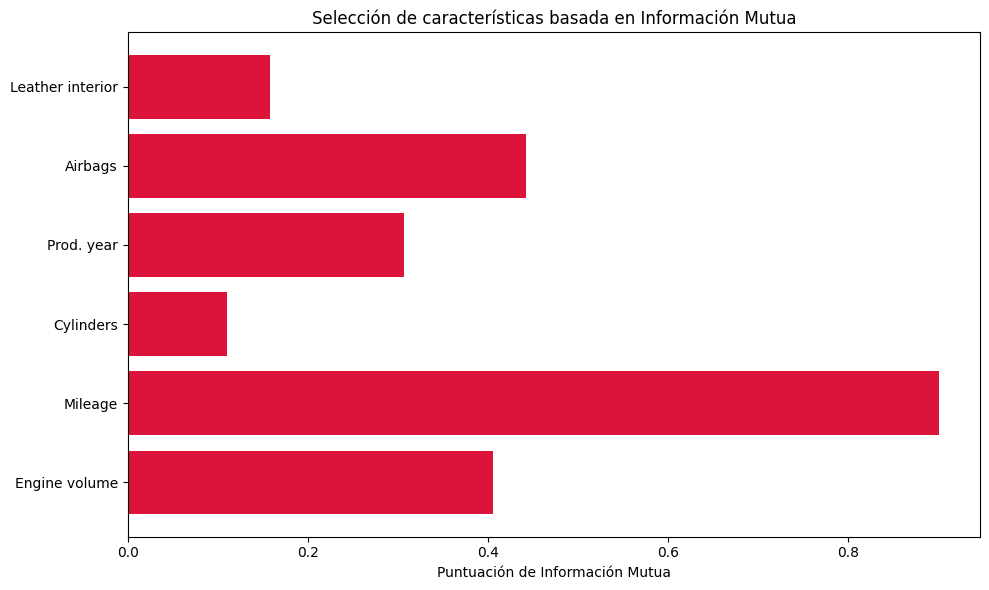

In [64]:
from sklearn.feature_selection import mutual_info_regression

if isinstance(df['Leather interior'][0], str):
    df['Leather interior'] = df['Leather interior'].map({'No': 0, 'Yes': 1})

variables = ['Engine volume', 'Mileage', 'Cylinders', 'Prod. year', 'Airbags', 'Leather interior']
X_seleccion = df[variables]

target = df['Price'] 

mi_scores = mutual_info_regression(X_seleccion, target)

plt.figure(figsize=(10, 6))
plt.barh(variables, mi_scores, color='crimson')
plt.xlabel('Puntuación de Información Mutua')
plt.title('Selección de características Info Mutua')
plt.tight_layout()
plt.show()

### Cantos datos faltan en total ficheiro de datos?

In [9]:
print("Total de valores faltantes:", df.isna().sum().sum())

Total de valores faltantes: 5819


### Selecciona as 3 columnas con maior varianza de entre as seguintes (sin estandarizar)

In [58]:
import pandas as pd
import numpy as np

varianzas = df.select_dtypes(include=[np.number]).var()
columnas_mayor_varianza = varianzas.sort_values(ascending=False)
print(columnas_mayor_varianza)

Mileage              2342934570887396.0
ID                  877203493261.106079
Price                36321220354.369019
Levy                       213321.17302
Airbags                       18.663855
Prod. year                     2.106615
Cylinders                       1.43984
Engine volume                  0.770541
Leather interior               0.199217
dtype: Float64


### A regresión Lasso, a regresión Ridge ou os algoritmos baseados en arbores de decisión seleccionan automáticamente as mellores variables para a predicción durante o proceso de adestramento do modelo.

Verdadero

### O criterio de información mútua unicamente captura dependencias lineais entre as variables. 

Falso, no captura únicamente eso.

### SMOTE é unha técnica de downsampling que se emprega para equilibrar as variables predictoras dun dataset desbalanceado.

Falso, es de upsampling

### Cal/cales dos seguintes codigos empregarias para contar cantos valores distintos ten unha columna categorica?

In [18]:
print(df['Manufacturer'].options)

AttributeError: 'Series' object has no attribute 'options'

In [19]:
print(df['Manufacturer'].type.allowed_values)

AttributeError: 'Series' object has no attribute 'type'

In [59]:
df['Manufacturer'] = df['Manufacturer'].astype('category')
print(len(df['Manufacturer'].dtype.categories)) # solo funciona si la columna es tipo 'category'.

65


In [23]:
print(len(df['Manufacturer'].unique()))

65


### 10. Emparella as diferentes tecnicas de imputación coa sua definición:

- SimpleImputer(strategy='most_frequent' -> Remplaza os valores faltantes polo valor máis frecuente
- SimpleImputer(strategy='mean') -> Remplaza os valores faltantes pola media
- KNNImputer() -> Calcula os valores faltantes consultando os veciños máis próximos
- IterativeImputer() -> Calcula os valores faltantes empregando modelos de regresión